# Chapter 7: Ensemble Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Placement Dataset

The dataset is a placement data set for a full class. The columns are the potential factors responsible for their placement. We want to try and predict the "status" column, which is whether someone was placed or not

In [3]:
data = pd.read_csv("Placement_Data.csv")
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
for column in data.columns:
    print(column, data[column].dtype, len(data[column].unique()))

sl_no int64 215
gender object 2
ssc_p float64 103
ssc_b object 2
hsc_p float64 97
hsc_b object 2
hsc_s object 3
degree_p float64 89
degree_t object 3
workex object 2
etest_p float64 100
specialisation object 2
mba_p float64 205
status object 2
salary float64 46


### Data Cleaning

* Drop the "sl_no", "salary" column
* Label Encode: "Gender", "ssc_b", "hsc_b", "workex", "specialisation"
* One Hot Encode: "hsc_s", "degree_t"

In [5]:
data_1 = data.drop(["sl_no", "salary"], axis=1)
data_1 

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [6]:
from sklearn.preprocessing import LabelEncoder

leb_enc = LabelEncoder()

columns_leb_enc = ["gender", "ssc_b", "hsc_b", "workex", "specialisation"]

data_1[columns_leb_enc] = data_1[columns_leb_enc].apply(leb_enc.fit_transform)

data_1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,Placed
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,Placed
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,Placed
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,Not Placed
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,Placed
211,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,Placed
212,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,Placed
213,0,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,Placed


In [7]:
columns_one_hot = ["hsc_s", "degree_t"]

data_status = data_1["status"]
data_2 = data_1.drop(["status"], axis=1)

data_3 = pd.get_dummies(data_2)

data_clean = pd.concat([data_3, data_status], axis=1)
data_clean


,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1,Placed
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1,Placed
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0,Placed
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1,Not Placed
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0,Placed
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1,Placed
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0,Placed
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,0,1,0,1,0,0,Placed


### Scaling the Data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_3)

data_scaled

array([[ 0.73943397, -0.02808697,  1.08245885, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397,  1.11336869, -0.92382264, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397, -0.21323793, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [-1.35238581,  0.61994138,  1.08245885, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [ 0.73943397, -0.49096436, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384]])

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = data_scaled
y = (data_status == "Placed").astype(np.int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train

array([[ 0.73943397,  1.03653104, -0.92382264, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397, -0.86126628,  1.08245885, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397,  0.05523096,  1.08245885, ..., -1.43924583,
        -0.23221018,  1.62605898],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [ 0.73943397, -1.41671915, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [-1.35238581,  0.43479043, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384]])

## ML Algorithms

In [11]:
def get_accuracy(clf):
    clf.fit(X_train, y_train)
    y_pred = ada_clf.predict(X_test)
    return accuracy_score(y_pred, y_test)

### Ensemble Classifiers

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnf_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnf_clf),('sc', svc_clf)], voting="hard")

In [13]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('sc', SVC())])

### Measuring Accuracy

In [14]:
from sklearn.metrics import accuracy_score


for clf in [log_clf, rnf_clf, svc_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8148148148148148
RandomForestClassifier 0.7962962962962963
SVC 0.7962962962962963
VotingClassifier 0.8148148148148148


The `VotingClassifier` in the above example actually performs worse than the `RandomForestClassifier` and as good as the `LogisticRegression` and `SVC`. We will try the *soft* voting method to see if it gives any better results.

In [15]:
rf_clf = RandomForestClassifier(random_state=42)
prob_svc = SVC(random_state=42, probability=True)      #probability needs to be set to True for the soft voting classifier 

soft_vot_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnf_clf),('sc', prob_svc)], voting="soft")


for clf in [log_clf, rf_clf, prob_svc, soft_vot_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8148148148148148
RandomForestClassifier 0.7777777777777778
SVC 0.7962962962962963
VotingClassifier 0.8148148148148148


### Bagging and Pasting

When sampling is performed with replacement, this method is called `bagging`⁠ (short for bootstrap aggregating⁠). When sampling is performed without replacement, it is called `pasting`.⁠

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
#'bootstrap=False' makes it a pasting classifier

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [17]:
print('Expected Test Accuracy: ', bag_clf.oob_score_)
print('Actual Test Accuracy: ', accuracy_score(y_test, y_pred))

Expected Test Accuracy:  0.8757763975155279
Actual Test Accuracy:  0.7407407407407407


In [18]:
bag_clf.oob_decision_function_ [:3] #gives the probabilities for every training instance.

array([[0.01136364, 0.98863636],
       [0.40199336, 0.59800664],
       [0.17602996, 0.82397004]])

### Feature Importance

In [19]:
rf_clf.fit(X_train, y_train)

for name, score in zip(data_3.columns, rf_clf.feature_importances_):
    print(name,':',round(score, 3))

gender : 0.02
ssc_p : 0.299
ssc_b : 0.011
hsc_p : 0.2
hsc_b : 0.011
degree_p : 0.179
workex : 0.032
etest_p : 0.069
specialisation : 0.02
mba_p : 0.105
hsc_s_Arts : 0.002
hsc_s_Commerce : 0.011
hsc_s_Science : 0.011
degree_t_Comm&Mgmt : 0.015
degree_t_Others : 0.005
degree_t_Sci&Tech : 0.01


### AdaBoost

`AdaBoost classifier` algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(random_state=42), n_estimators=200, learning_rate=0.5, algorithm="SAMME.R" )

get_accuracy(ada_clf)

0.8148148148148148

### Gradient Boosting

`Gradient Boosting` works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like `AdaBoost` does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=150, learning_rate=0.2)

get_accuracy(gb_clf)

0.8148148148148148

### XGBoost

In [23]:
import xgboost as xgb

# if more than one evaluation metric are given the last one is used for early stopping
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

xgb_clf.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
y_pred = xgb_clf.predict(X_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.83310
[1]	validation_0-auc:0.85085
[2]	validation_0-auc:0.84588
[3]	validation_0-auc:0.84446
[4]	validation_0-auc:0.86577
[5]	validation_0-auc:0.86577
[6]	validation_0-auc:0.86293
[7]	validation_0-auc:0.86080
[8]	validation_0-auc:0.86151


c:\Users\16044\anaconda3\envs\hands_on_ml\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.7962962962962963

`xgb_clf.fit()` will produce a model from the last iteration, not the best one, so to get the optimum model consider retraining over xgb_model.best_iteration rounds.

In [24]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_clf.best_score, xgb_clf.best_iteration, xgb_clf.best_ntree_limit))

best score: 0.8657670454545454, best iteration: 4, best ntree limit 5


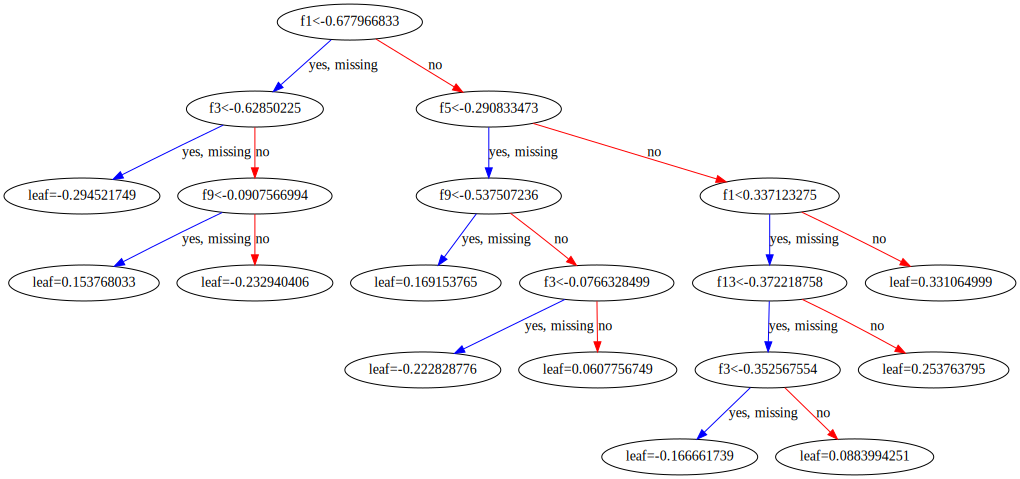

In [25]:
# requires graphviz and python-graphviz conda packages
import graphviz

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_clf, num_trees=xgb_clf.best_iteration)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

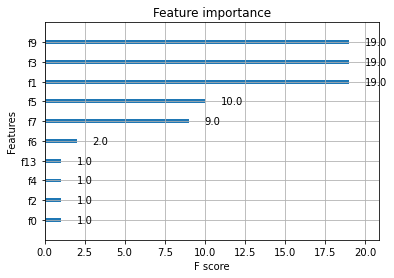

In [27]:
xgb.plot_importance(xgb_clf)

### Stacking 

In [26]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
get_accuracy(stacking_clf)

0.8148148148148148

`XGBoosting` seems to give the best accuracy score.